# Assigment 4

# This is a mini-project assignment that includes only programming questions. You are asked to implement optimization algorithms for ML classification problems. 

## Marking of this assignment will be based on the correctness of your ML pipeline and efficiency of your code. 

## Upload your code on Learn dropbox and submit pdfs of the code and to Crowdmark.

## -----------------------------------------------------------------------------------------------------------

In [1]:
# !pip install numpy, scipy, sys

## Suggested way of loading data to python for the assigment. There are alternatives of course, you can use your preferred way if you want.

In [214]:
# Download the LIBSVM package from here: https://www.csie.ntu.edu.tw/~cjlin/libsvm/#download 
# If your download is successfull you should have the folder with name: libsvm-3.24.
# We will use this package to load datasets. 

# Enter the downloaded folder libsvm-3.24 through your terminal. 
# Run make command to compile the package.

# Load this auxiliary package.
import sys

# add here your path to the folder libsvm-3.24/python
path = "/Users/lingxuan925/Documents/CS794/a4/libsvm-3.24/python/"
# Add the path to the Python paths so Python can find the module.
sys.path.append(path)

# Load the LIBSVM module.
from svmutil import *

# Add here your path to the folder libsvm-3.24
path = "/Users/lingxuan925/Documents/CS794/a4/libsvm-3.24/"

# Test that it works. This will load the data "heart_scale" 
# and it will store the labels in "b" and the data matrix in "A".
b, A = svm_read_problem(path + 'heart_scale')

# Use "svm_read_problem" function to load data for your assignment.

# Note that matrix "A" stores the data in a sparse format. 
# In particular matrix "A" is a list of dictionaries. 
# The length of the list gives you the number of samples.
# Each entry in the list is a dictionary. The keys of the dictionary are the non-zero features.
# The values of the dictionary for each key is a list which gives you the feature value. 

## Load other useful modules

In [215]:
import matplotlib.pyplot as plt

# Numpy is useful for handling arrays and matrices.
import numpy as np
from numpy.linalg import norm
import time
from scipy.sparse import csr_matrix
from scipy import sparse
import sklearn.feature_extraction
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
import random

## Datasets that you will need for this assignment.

In [216]:
# There is an extended selection of classification and regression datasets 
# https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/

# Out of all these datasets you will need the following 3 datasets, which are datasets for classification problems.
# 
# a9a dataset: https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary.html#a9a 
# This dataset is small, it is recommened to start your experiments with this dataset.
#
# news20.binary dataset: https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary.html#news20.binary
#
# covtype.binary dataset: https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary.html#covtype.binary
#
# Exploit the sparsity of the problem when you implement optimization methods.

## Training, Validation and Testing data

In [217]:
# All datasets above consist of training and testing data. 

# You should seperate the training data into training and validation data.
# Follow the instructions from the lectures about how you can use both training and validation data.
# You can use 10% of the training data as validation data and the remaining 90% to train the models.
# This is a suggested percentage, you can do otherwise if you wish.

# Do not use the testing data to influence training in any way. Do not use the testing data at all.
# Only your instructor and TA will use the testing data to measure generalization error. 
# If you do use the testing data to tune parameters or for training of the algorithms we will figure it out :-). 

## Optimization problems

### You need to solve the following optimization problems 

Hinge-loss
$$\mbox{minimize}_{x\in\mathbb{R}^d, \beta \in \mathbb{R}}  \frac{1}{n} \sum_{i=1}^n \max \{0,1-b_i(a_i^Tx + \beta)\},$$
where $a_i\in\mathbb{R}^d$ is the feature vector for sample $i$ and $b_i$ is the label of sample $i$. The sub-gradient of the hinge-loss is given in the lecture slides (note that there is a small difference due to the intercept $\beta$). A smooth approximation of the function $f(z):=\max\{0,1-z\}$ is given by
$$
\psi_\mu(z) = 
\begin{cases}
0 & z\ge 1\\
(1-z)^2 & \mu < z < 1 \\
(1-\mu)^2 + 2(1-\mu)(\mu-z) & z \le \mu.
\end{cases}
$$
You can use the smooth approximation $\psi_\mu(z)$ for methods that work only for smooth functions. For sub-gradient methods you should use the sub-gradient.

L2-regularized logistic regression
$$\mbox{minimize}_{x\in\mathbb{R}^d,\beta\in\mathbb{R}}  \lambda \|x\|_2^2 + \frac{1}{n} \sum_{i=1}^n \log (1+ \exp(-b_i(a_i^Tx + \beta))).$$
This is a smooth objective function, therefore, you should use gradient methods to solve it. You do not need sub-gradient methods for this problem.

Note that for hinge-loss the labels should be -1 or 1. For logistic regression the labels should be 0 or 1. Check the labels that you loaded to make sure that they have the correct values for the correct problem. If not, then convert them appropriately.

## Optimization algorithms

In [218]:
# For this assignment you will need the following methods

# 1) Stochastic sub-gradient
# 2) Stochastic gradient
# 3) Mini-batch (sub-)gradient (you will have to decide what batching strategy to use, see lecture slides)
# 4) Stochastic average sub-gradient (SAG)
# 5) Stochastic average gradient (SAG)
# 6) Gradient descent with Armijo line-search
# 7) Acceleratd gradient with Armijo line-search (the same method as Q5 in Assignemnt 3)

# Information is provided in the lecture slides about parameter tuning and termination.
# However, the final decision of any parameter tuning and termination criteria is up to the students to make. 

In [219]:
lambda_=0.005
max_iterations = 800
gamma = 0.4
epsilon = 1.0e-2
mu = 0.1

path = "/Users/lingxuan925/Documents/CS794/a4/datasets/a9a"
trainingL, trainingD = svm_read_problem(path)
path = "/Users/lingxuan925/Documents/CS794/a4/datasets/a9a.t"
testingL, testingD = svm_read_problem(path)

vectors = sklearn.feature_extraction.DictVectorizer(sparse=True, dtype=float)

trainingD = vectors.fit_transform(trainingD)
trainingL = np.array([trainingL]).T
features = trainingD.shape[1]

n = trainingD.shape[0]
ones = np.ones((n,1))
trainingD = hstack([ones, trainingD]).tocsr()

trainingD, validationSet, trainingL, vlabel = train_test_split(trainingD, trainingL, test_size=0.1)

def getW():
    weights = np.ones(124)
    weights = np.reshape(weights,(len(weights),1))
    return weights

from numpy.linalg import norm
def linear_regression(w, t_d, t_l, n, lambda_):
    result = lambda_ * (norm(w,2)**2) + (1/n)*np.sum(np.log(1+np.exp(-t_l*t_d.dot(w))))
    return result

def gradientLR(w, t_d, t_l, n, lambda_):
    result = np.array(2*lambda_*w)+np.array(((1/n)*np.sum(t_d.multiply(-t_l/(1+np.exp(t_l*t_d.dot(w)))),axis = 0)).T)
    return result

def armijo(w, t_d, t_l, n, lambda_, gamma):
    alpha = 1
    linear_regression_k = linear_regression(w, t_d, t_l, n, lambda_)
    grad = gradientLR(w, t_d, t_l, n, lambda_)
    w_k = w - alpha * grad
    f_k = linear_regression(w_k, t_d, t_l, n, lambda_)
    delta = gamma * (norm(grad,2)**2)
    norm_grad = alpha * delta
    while f_k > linear_regression_k - norm_grad:
        alpha = alpha/2
        w_k = np.array(w - alpha * grad)
        f_k = linear_regression(w_k, t_d, t_l, n, lambda_)
        norm_grad = alpha * delta
    return alpha

def gradient_descent_armijo(w_k, t_l, t_d, lambda_, gamma, max_is, epsilon):
    w = w_k
    n = t_l.shape[0]
    grad = gradientLR(w, t_d, t_l, n, lambda_)
    i = 0
    startTime = time.time()
    linear_regression_array = [linear_regression(w, t_d, t_l, n, lambda_)]
    running_time =[0]
    while norm(grad,2) > epsilon and i < max_is:
        alpha = armijo(w, t_d, t_l, n, lambda_, gamma)
        w = w - alpha * grad
        grad = gradientLR(w, t_d, t_l, n, lambda_)
        linear_regression_array.append(linear_regression(w, t_d, t_l, n, lambda_))
        running_time.append(time.time()-startTime)
        i += 1
    return w, linear_regression_array, running_time

def validation(weights, vlabel, matrix):
    p = 1/(np.exp(-matrix*weights)+1)
    p = np.where(p > 0.5, 1,-1)
    e = np.sum(abs(p - vlabel))
    e = e/len(p)
    e = e/2
    return p,e
np.set_printoptions(threshold=np.inf)

def testing(testingD,weights,testingL,features):
    testingL = np.array(testingL)
    testingL = np.asarray(testingL)
    testingL = np.reshape(testingL,(len(testingL),1))
    A = np.zeros((len(testingD),features+1))

    for i in range(len(testingD)):
        A[i][0] = 1
        for key in testingD[i]:
            A[i][key] =1
    A = sparse.csr_matrix(A)
    p, e = validation(weights,testingL,A)
    print(str(e))
    return

# gradient descent for LR
weights = getW()
weightsLR, arrayLR, timeLR = gradient_descent_armijo(weights, trainingLabel, trainingSet, lambda_,gamma, max_is, epsilon)
p, e = validation(weightsLR, vlabel, validationSet)
print(str(e))

testing(testingD, weightsLR, testingL, features)


0.1618053423395763
0.1557029666482403


## Acceleratd gradient with Armijo line-search for logistic regression

In [220]:
# method 7
def accelerated_armijo(w_k, t_l, t_d, lambda_, gamma, max_iter, epsilon):
    n = t_l.shape[0]
    w = w_k
    v = w_k
    t = 1
    t_prev = t
    w_prev = w
    grad = gradientLR(w, t_d, t_l, n, lambda_)
    i = 1
    LRlist = []
    LRlist.append(linear_regression(w, t_d, t_l, n, lambda_))
    startTime = time.time()
    running_time =[]
    running_time.append(0)
    while norm(grad,2) > epsilon and i < max_iter:
        alpha = armijo(v, t_d, t_l, n, lambda_, gamma)
        w = v - alpha * gradientLR(v, t_d, t_l, n, lambda_)
        t = (1 + (1+4*(t**2))**(0.5))/2
        v = w + ((t_prev-1)/t)*(w - w_prev)
        grad = gradientLR(w, t_d, t_l, n, lambda_)
        t_prev = t
        w_prev = w
        i +=1
        LRlist.append(linear_regression(w, t_d, t_l, n, lambda_))
        running_time.append(time.time()-startTime)
    return w, LRlist, running_time
    
# method 2 
def stochastic_gradient_descent(w_k, t_l, t_d, lambda_, max_iter):
    n = t_l.shape[0]
    w = w_k
    j = random.randint(0, t_d.shape[0]-1)
    grad = gradientLR(w, t_d[j], t_l[j], 1, lambda_)
    i = 1
    startTime = time.time()
    LRlist = [linear_regression(w, t_d, t_l, n, lambda_)]
    running_time =[0]
    sumw = w
    while i < max_iter:
        alpha =1/i
        w = w - alpha * grad
        j = random.randint(0, t_d.shape[0]-1)
        grad = gradientLR(w, t_d[j], t_l[j], 1, lambda_)
        LRlist.append(linear_regression(w, t_d, t_l, n, lambda_))
        running_time.append(time.time()-startTime)
        sumw+=w
        i += 1
    average = sumw/i
    return average, LRlist, running_time

# method 3 
def stochastic_gradient_descent_miniBatch(w_k, t_l, t_d, lambda_, max_iter):
    n = t_l.shape[0]
    w = w_k
    batch = 8
    i = 1
    startTime = time.time()
    LRlist = [linear_regression(w, t_d, t_l, n, lambda_)]
    running_time =[0]
    sumw = w
    while True:
        grad = 0
        indices = np.round(np.random.rand(batch)*(t_d.shape[0] - 1)).astype(int)
        grad = gradientLR(w, t_d[indices], t_l[indices], batch, lambda_)
        alpha = 1/i
        w = w - alpha * grad
        LRlist.append(linear_regression(w, t_d, t_l, n, lambda_))
        running_time.append(time.time()-startTime)
        sumw+=w
        i += 1
        if i > max_iter: break
    average = sumw/i
    return average, LRlist, running_time



# method 5
def stochastic_gradient_descent_avg(w_k, t_l, t_d, lambda_, max_iter):
    n = t_l.shape[0]
    w = w_k
    i = 1

    startTime = time.time()
    LRlist = [linear_regression(w, t_d, t_l, n, lambda_)]
    running_time =[0]
    sumw = w
    w_previous = w
    grad_sum = 0
    grad_sum = gradientLR(w, t_d, t_l, n, lambda_)

    while True:
        j = random.randint(0, t_d.shape[0]-1)
        grad_new = gradientLR(w, t_d[j], t_l[j], 1, lambda_)
        grad_old = gradientLR(w_previous, t_d[j], t_l[j], 1, lambda_)
        constant = 2.3
        step = 1/constant
        alpha = step/i
        grad_sum = (1/n)*(grad_new - grad_old) + grad_sum
        w_previous = w
        w = w - alpha *(grad_sum)
        LRlist.append(linear_regression(w, t_d, t_l, n, lambda_))
        running_time.append(time.time()-startTime)
        sumw+=w
        i += 1
        if i > max_iter: break
    average = sumw/i
    return average, LRlist, running_time

In [221]:
# 3
weights = getW()
weights_method3, linear_regression_array_method3, running_time_method3 = stochastic_gradient_descent_miniBatch(weights, trainingLabel, trainingSet, lambda_, max_iterations)
p,error = validation(weights_method3, vlabel, validationSet)
print("error "+ str(error))


error 0.2840036843721216


In [222]:
# 5
weights = getW()
weights_method5, linear_regression_array_method5, running_time_method5 = stochastic_gradient_descent_avg(weights, trainingLabel, trainingSet, lambda_, max_iterations)
p,error = validation(weights_method5, vlabel, validationSet)
print("error "+ str(error))

error 0.3761129874117286


In [225]:
# 7
weights = getW()
weights_method7, linear_regression_array_method7, running_time_method7 = accelerated_armijo(weights, trainingLabel, trainingSet, lambda_, gamma, max_iterations, epsilon)
p,error = validation(weights_method7, vlabel, validationSet)
print("error "+ str(error))

error 0.16518268345102854


In [226]:
# 2
weights = getW()
weights_method2, linear_regression_array_method2, running_time_method2 = stochastic_gradient_descent(weights, trainingLabel, trainingSet, lambda_, max_iterations)
p,error = validation(weights_method2, vlabel, validationSet)
print(error)

0.29045133558489405


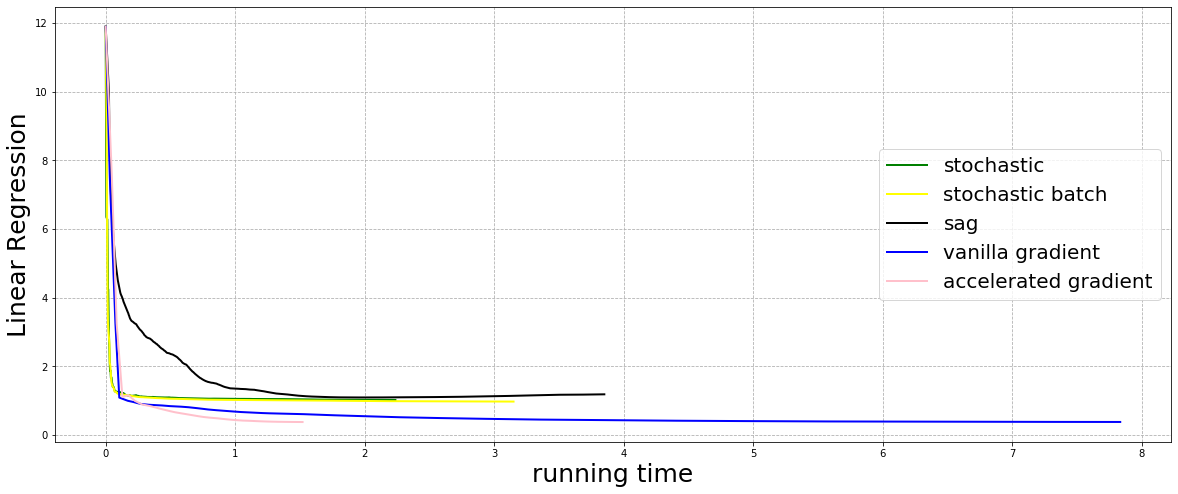

In [227]:
fig = plt.figure(figsize=(20, 8))
plt.plot(running_time_method2,linear_regression_array_method2, label=("stochastic"), linewidth=2.0, color ="green")
plt.plot(running_time_method3,linear_regression_array_method3, label=("stochastic batch"), linewidth=2.0, color ="yellow")
plt.plot(running_time_method5,linear_regression_array_method5, label=("sag"), linewidth=2.0, color ="black")
plt.plot(timeLR,arrayLR, label=("vanilla gradient"), linewidth=2.0, color ="blue")
plt.plot(running_time_method7,linear_regression_array_method7, label=("accelerated gradient"), linewidth=2.0, color ="pink")
plt.legend(prop={'size': 20},loc="right")
plt.xlabel("running time", fontsize=25)
plt.ylabel("Linear Regression", fontsize=25)
plt.grid(linestyle='dashed')
plt.show()

## Validation error: measure the validation error by calculating
$$
\frac{1}{t}\sum_{i\in\mbox{validation data}} \left| \ b_i^{\mbox{your model}} - b_i^{\mbox{true}} \ \right|
$$
where $t$ is the number of samples in your validation set. $b_i^{\mbox{true}}$ is the true label of the $i$-th sample. $b_i^{\mbox{your model}}$ is the label of the $i$-th sample of your model.

For hinge loss calculate $$b_i^{\mbox{your model}}:= \mbox{sign}(a_i^Tx + \beta).$$

For logistic regression calculate the predicted label by
$$
b_i^{\mbox{your model}}=
\begin{cases}
1 & \mbox{if } \frac{1}{1+e^{-(a_i^Tx + \beta)}} > 0.5\\
-1 & \mbox{otherwise}
\end{cases}
$$

## Question 1: Use the ML pipeline that is mentioned in slide 60 of Lecture 11 to train your model for the logistic regression problem (the hinge-loss problem does not have any hyper-parameters). Pick any algorithm that you want from the above suggested list to train the models. Report your ML pipeline. Print your Generalization Error. We will not measure running time for this pipeline. Running time will be measure only in Q2. Marks: 30.

## Question 2: Plot the objective function (y-axis) vs running time in sec (x-axis). Have one plot for each optimization problem. In each plot show the performance of all relevant algorithms. For each plot use the parameter setting that gives you the best validation error in Q1 (this refers to the logistic regression probelm). Do not show plots for all parameter settings that you tried in Q1, only for the one that gives you the smallest validation error. Do not include computation of any plot data in the computation of the running time of the algorithm, unless the plot data are computed by the algorithm anyway. Make sure that the plots are clean and use appropriate legends. Note that we should be able to re-run the code and obtain the plots. Marks: 70.

### For this question, we will measure the running time of your stochastic sub-gradient method for the sparse dataset news20.binary for the hinge-loss problem. We will not measure the running time of any other combination of algorithm, dataset, problem. You need to implement the stochastic sub-gradient method and encapsulate it in a python class.

To make sure your object can be used by our script, your class should have two methods:

1. <strong>fit(self, train_data, train_label)</strong>. It will use stochastic sub-gradient method to minimize the hinge loss and store the optimized coefficients (i.e. $x, \beta$) in the instance. The "train_data" and "train_label" are similar to the output of "svm_read_problem". 
    * "train_data" is a list of $n$ python dictionaries (int -> float), which presents a sparse matrix. The keys (int) and values (float) in the dictionary at train_data[i] are the indices (int) and values (float) of non-zero entries of row $i$. 
    * "train_label" is a list of $n$ integers, it only has <strong>-1s and 1s</strong>. $n$ is the number of samples.  This function returns nothing.


2. <strong>predict(self, test_data)</strong>. It will predict the label of the input "test_data" by using the coefficients stored in the instance. The "test_data" has the same data structure as the "train_data" of the "fit" function. This function returns a list of <strong>-1s and 1s</strong> (i.e. the prediction of your labels).

You can also define other methods to help your programming, we will only call the two methods decribed above.

To let us import your class, you need to follow these rules:

1. You should name your python file by <strong>a4_[your student ID].py</strong>. For example, if your student id is 12345, then your file name is <strong>a4_12345.py</strong>
1. Your object name should be <strong>MyMethod</strong> (it's case sensitive).

Any violation of the above requirements will get error in our script and you will get at most 50% of the total score. Your solution will be mainly measured by the runing time of the <strong>fit</strong> function and the accuracy of the <strong>predict</strong> function. For example your method will be called and measured in following pattern:

    obj = MyMethod()
    st = time.time()
    obj.fit(train_data, train_label) # .fit() optimizes the objective and stores coefficients in obj.
    running_time = time.time() - st
    predict_label = obj.predict(test_data)
    accuracy = get_accuracy(predict_label, test_label) # this is a function we use to measure accuracy.
Then your accuracy will be measured by <strong>predict_labels</strong>, you don't have to implement "get_accuracy". When you finish your implementation, upload the .py file to Learn dropbox.

## Hinge-Loss

In [231]:
def hinge_loss(w, t_l, t_d):
    tmp = 1-t_l*t_d.dot(w)
    tmp = np.where(tmp>0, tmp , 0)
    result = (1/t_l.shape[0])*np.sum(tmp)
    return result

def subgradient_hinge_loss(w, t_l_i, t_d_i):
    tmp = t_l_i*t_d_i.dot(w)
    if 1-tmp>0:
        result = -t_l_i*t_d_i
        result = np.reshape(result, (len(result), 1))
    else:
        result = np.zeros((w.shape[0], 1))
    return result

def stochastic_subgradient_hinge_Loss(w, t_l, t_d, max_iters):
    n = t_l.shape[0]
    idx = random.randint(0, t_d.shape[0]-1)
    gradw = subgradient_hinge_loss(w, t_l[idx], t_d[idx])
    iter = 1
    startTime = time.time()
    hinge_loss_array = [hinge_loss(w, t_l, t_d)]
    runTime =[0]
    sumw = w
    while iter < max_iters:
        alpha = 1/iter
        w = w - alpha * gradw
        idx = random.randint(0, t_d.shape[0]-1)
        gradw = subgradient_hinge_loss(w, t_l[idx], t_d[idx])
        hinge_loss_array.append(hinge_loss(w, t_l, t_d))
        runTime.append(time.time()-startTime)
        sumw+=w
        iter += 1
    average = sumw/iter
    return average, hinge_loss_array, runTime

def validation_hinge_loss(weights, vlabel, matrix):
    p = matrix.dot(weights)
    p = np.where(p >0 , 1, -1)
    error = np.sum(abs(p - vlabel))
    error = error/len(p)
    error = error/2
    return p, error

def sub_stochastic_gradient_mini_hinge(w_k, t_l, t_d, max_iters):
    n = t_l.shape[0]
    w = w_k
    batch = 18
    iter = 1
    startTime = time.time()
    hinge_loss_array = [hinge_loss(w, t_l, t_d)]
    runTime =[0]
    sumw = w
    while True:
        grad = 0
        for k in range(batch):
            idx = random.randint(0, t_d.shape[0]-1)
            grad += sub_gradient_hing_loss(w, t_l[idx], t_d[idx])
        grad = (1/batch)*grad
        alpha = 1/iter
        w = w - alpha * grad
        hinge_loss_array.append(hinge_loss(w, t_l, t_d))
        runTime.append(time.time()-startTime)
        sumw+=w
        iter += 1
        if iter > max_iters: break
    average = sumw/iter
    return average, hinge_loss_array, runTime

def sag(w_k, t_l, t_d, max_iters):
    w = w_k
    sumw = w
    hinge = hinge_loss(w, t_l, t_d)
    hinge_loss_array = [hinge]
    i = 0
    grad_sum = subgradient_hinge_loss(w, t_l[0], t_d[0])
    for j in range(1, t_d.shape[0]):
        grad_sum += subgradient_hinge_loss(w, t_l[j], t_d[j])
    startTime = time.time()
    runTime = [0]
    grad_sum = grad_sum / t_d.shape[0]
    prev_w = w
    while True:
        if i >= max_iters: break
        alpha = 0.4/(i+1)
        idx = random.randint(0, t_d.shape[0]-1)
        prev_grad = subgradient_hinge_loss(prev_w, t_l[idx], t_d[idx])
        updated = subgradient_hinge_loss(w, t_l[idx], t_d[idx])
        grad_sum = grad_sum - (prev_grad - updated)/len(t_l)
        prev_w = w
        w = w - alpha * grad_sum
        sumw = np.array(w).reshape((len(w),1)) + sumw
        hinge = hinge_loss(w, t_l, t_d)
        hinge_loss_array.append(hinge)
        i += 1
        runTime.append(time.time() - startTime)
    result = sumw/len(hinge_loss_array)
    return result, hinge_loss_array, runTime

In [232]:
weights = getW()
weights_stochastic, hinge_loss_array_stochastic, runTime_stochastic = stochastic_subgradient_hinge_Loss(weights, trainingLabel, trainingSet, max_iterations)
p, error = validation_hing(weights_stochastic, vlabel, validationSet)
print("error "+ str(error))

error 0.2600552655818238


In [233]:
weights = getW()
weights_sag, hinge_loss_array_sag, runTime_sag = sag(weights, trainingL, trainingD, max_iterations)
p,error = validation_hing(weights_sag, vlabel, validationSet)
print("error "+ str(error))

error 0.6174393613754989


In [235]:
weights = getW()
weights_minibatch, hinge_loss_array_minibatch, runTime_minibatch = sub_stochastic_gradient_mini_hinge(weights, trainingL, trainingD, max_iterations)
p,error = validation_hing(weights_minibatch, vlabel, validationSet)
print("error "+ str(error))

error 0.2594412035615597


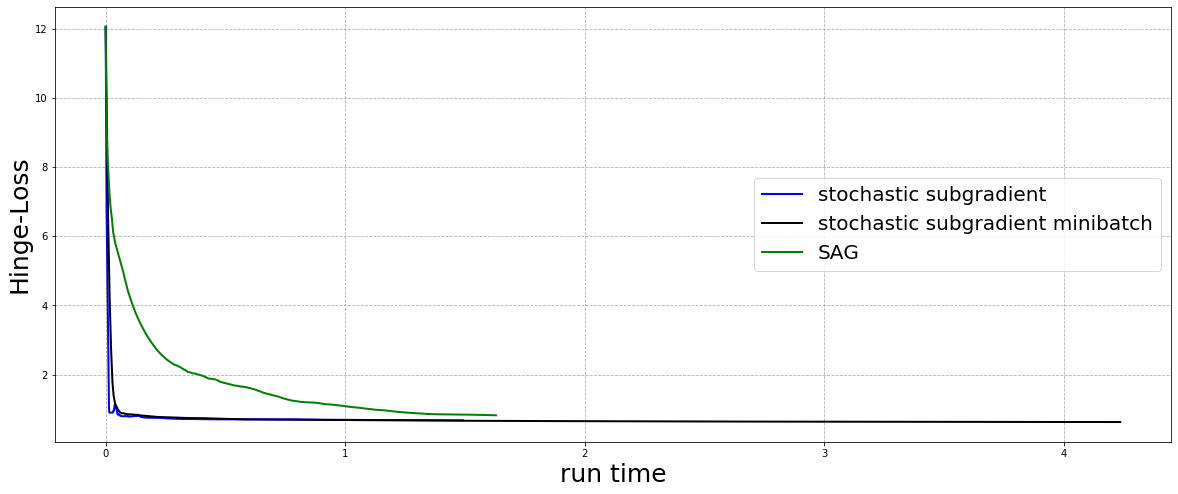

In [236]:
fig = plt.figure(figsize=(20, 8))
plt.plot(runTime_stochastic, hinge_loss_array_stochastic, label=("stochastic subgradient"), linewidth=2.0, color ="blue")
plt.plot(runTime_minibatch, hinge_loss_array_minibatch, label=("stochastic subgradient minibatch"), linewidth=2.0, color ="black")
plt.plot(runTime_sag, hinge_loss_array_sag, label=("SAG"), linewidth=2.0, color ="green")
plt.legend(prop={'size': 20},loc="right")
plt.xlabel("run time", fontsize=25)
plt.ylabel("Hinge-Loss", fontsize=25)
plt.grid(linestyle='dashed')
plt.show()

## HINGE-LOSS SMOOTH

In [240]:

def hinge_loss_smooth(w, t_l, t_d, mu):
    tmp = t_l*t_d.dot(w)
    result = np.where(tmp<=mu, (1-mu)**2+2*(1-mu)*(mu-tmp),(1-tmp)**2)
    result = np.where(tmp >=1, 0, result)
    result = (1/t_l.shape[0])*np.sum(result)
    return result

def hinge_loss_smooth_grad(w, t_l, t_d, mu):
    tmp = t_l*t_d.dot(w)
    grad_tmp = t_d.multiply(t_l)
    grad1 = -2*grad_tmp+2*mu*grad_tmp
    grad2 = 2*grad_tmp.multiply(1-tmp)
    zeros = np.zeros((t_d.shape[0],t_d.shape[1]))
    repeated_tmp = np.repeat(tmp, t_d.shape[1], axis=1)
    result = np.where(repeated_tmp<=mu, grad1.todense(), grad2.todense())
    result = np.where(repeated_tmp>=1, zeros, result)
    result = 1/t_l.shape[0] * np.sum(result,axis =0).T
    result = np.reshape(result,(len(result),1))
    return result

def line_search_armijo_hinge_loss(w, t_l, t_d, gamma, mu):
    alpha = 1
    hinge_smooth = hinge_loss_smooth(w, t_l, t_d, mu)
    grad = hinge_loss_smooth_grad(w, t_l, t_d, mu)
    w_k = w - alpha * grad
    hinge_smooth_k = hinge_loss_smooth(w, t_l, t_d, mu)
    delta = gamma * (norm(grad,2)**2)
    norm_grad = alpha * delta
    while hinge_smooth_k > hinge_smooth - norm_grad:
        alpha /= 2
        w_k = np.array(w - alpha * grad)
        hinge_smooth_k = hinge_loss_smooth(w_k, t_l, t_d, mu)
        norm_grad = alpha * delta
    return alpha

def graddescent_armijo_hinge(w_k, t_l, t_d, gamma, max_iters, epsilon, mu):
    w = w_k
    n = t_l.shape[0]
    gradw = hinge_loss_smooth_grad(w, t_l, t_d, mu)
    iter = 0
    startTime = time.time()
    hinge_loss_array = [hinge_loss_smooth(w, t_l, t_d, mu)]
    runTime =[0]
    while norm(gradw,2) > epsilon and iter < max_iters:
        alpha = line_search_armijo_hinge_loss(w, t_l, t_d, gamma, mu)
        hinge = hinge_loss_smooth(w, t_l, t_d, mu)
        w = w - alpha * gradw
        gradw = hinge_loss_smooth_grad(w, t_l, t_d, mu)
        hinge_k = hinge_loss_smooth(w, t_l, t_d, mu)
        hinge_loss_array.append(hinge_k)
        runTime.append(time.time()-startTime)
        iter += 1
        if abs(hinge_k - hinge) <0.001:
            break
    return w, hinge_loss_array, runTime

def accelerated_gradient_armijo_hinge(w_k, t_l, t_d, gamma, max_iters, epsilon, mu):
    n = t_l.shape[0]
    w = w_k
    v = w_k
    t = 1
    prev_t = t
    prev_w = w
    gradw = hinge_loss_smooth_grad(w, t_l, t_d, mu)
    iter = 1
    HLLIST = [hinge_loss_smooth(w, t_l, t_d, mu)]
    startTime = time.time()
    runTime =[0]
    while norm(gradw,2) > epsilon and iter < max_iters:
        alpha = line_search_armijo_hinge_loss(v, t_l, t_d, gamma, mu)
        hinge = hinge_loss_smooth(v, t_l, t_d, mu)
        w = v - alpha * hinge_loss_smooth_grad(v, t_l, t_d, mu)
        t = (1 + (1+4*(t**2))**(0.5))/2
        v = w + ((prev_t-1)/t)*(w - prev_w)
        gradw = hinge_loss_smooth_grad(w, t_l, t_d, mu)
        prev_t = t
        prev_w = w
        iter +=1
        hinge_k = hinge_loss_smooth(w, t_l, t_d, mu)
        HLLIST.append(hinge_k)
        runTime.append(time.time()-startTime)
        if abs(hinge_k - hinge) < 0.001:
            break
    return w, HLLIST, runTime

def stochastic_gradient_descent_hinge_loss(w_k, t_l, t_d, max_iters, mu):
    n = t_l.shape[0]
    w = w_k
    idx = random.randint(0, t_d.shape[0]-1)
    gradw = hinge_loss_smooth_grad(w, t_l[idx],t_d[idx], mu)
    iter = 1
    startTime = time.time()
    hinge_loss_array = [hinge_loss_smooth(w, t_l, t_d, mu)]
    runTime =[0]
    sumw = w
    while iter < max_iters:
        alpha = 1/iter
        w = w - alpha * gradw
        idx = random.randint(0, t_d.shape[0]-1)
        gradw = hinge_loss_smooth_grad(w, t_l[idx],t_d[idx], mu)
        hinge_loss_array.append(hinge_loss_smooth(w, t_l, t_d, mu))
        runTime.append(time.time()-startTime)
        sumw+=w
        iter += 1
    average = sumw/iter
    return average, hinge_loss_array, runTime

def stochastic_gradient_descent_miniBatch_hinge_loss(w_k, t_l, t_d, max_iters, mu):
    n = t_l.shape[0]
    w = w_k
    batch = 8
    iter = 1
    startTime = time.time()
    hinge_loss_array = [hinge_loss_smooth(w, t_l, t_d, mu)]
    runTime =[0]
    sumw = w
    while True:
        gradw = 0
        idx = np.round(np.random.rand(batch)* (t_d.shape[0] - 1)).astype(int)
        gradw = hinge_loss_smooth_grad(w, t_l[idx], t_d[idx], mu)
        alpha = 1/iter
        w = w - alpha * gradw
        hinge_loss_array.append(hinge_loss_smooth(w, t_l, t_d, mu))
        runTime.append(time.time()-startTime)
        sumw+=w
        iter += 1
        if iter > max_iters:
            break
    average = sumw/iter
    return average, hinge_loss_array, runTime

def sag_hinge_loss(w_k, t_l, t_d, max_iters, mu):
    n = t_l.shape[0]
    w = w_k
    iter = 1
    startTime = time.time()
    hinge_loss_array = [hinge_loss_smooth(w, t_l, t_d, mu)]
    runTime =[0]
    sumw = w
    w_previous = w
    sum_grad = 0
    sum_grad = hinge_loss_smooth_grad(w, t_l, t_d, mu)
    while True:
        idx = random.randint(0,t_d.shape[0]-1)
        new_grad = hinge_loss_smooth_grad(w, t_l[idx],t_d[idx], mu)
        old_grad = hinge_loss_smooth_grad(w_previous, t_l[idx], t_d[idx], mu)
        step = 1/4
        alpha = step/iter
        sum_grad = (1/n)*(new_grad - old_grad) + sum_grad
        w_previous = w
        w = w - alpha *(sum_grad)
        hinge_loss_array.append(hinge_loss_smooth(w, t_l, t_d, mu))
        runTime.append(time.time()-startTime)
        sumw+=w
        iter += 1
        if iter > max_iters: break
    average = sumw/iter
    return average, hinge_loss_array, runTime


In [241]:
weights = getW()
weights_method6_hinge_loss, array_method6_hinge_loss, runTime_method6_hinge_loss = graddescent_armijo_hinge(weights, trainingL, trainingD, gamma, 50, epsilon, mu)
p,error = validation_hinge_loss(weights_method6_hinge_loss, vlabel, validationSet)
print("error "+ str(error))

error 0.27018728891618055


In [242]:
weights = getW()
weights_method7_hinge_loss, array_method7_hinge_loss, runTime_method7_hinge_loss = accelerated_gradient_armijo_hinge(weights, trainingL, trainingD, gamma, 50, epsilon, mu)
p,error = validation_hinge_loss(weights_method7_hinge_loss, vlabel, validationSet)
print("error "+ str(error))

error 0.26650291679459626


In [243]:
weights = getW()
weights_method2_hinge_loss, array_method2_hinge_loss, runTime_method2_hinge_loss = stochastic_gradient_descent_hinge_loss(weights, trainingL, trainingD, max_iterations, mu)
p,error = validation_hinge_loss(weights_method2_hinge_loss, vlabel, validationSet)
print("error "+ str(error))

error 0.3306723979121891


In [244]:
weights = getW()
weights_method3_hinge_loss, array_method3_hinge_loss, runTime_method3_hinge_loss = stochastic_gradient_descent_miniBatch_hinge_loss(weights, trainingL, trainingD, max_iterations, mu)
p,error = validation_hinge_loss(weights_method3_hinge_loss, vlabel, validationSet)
print("error "+ str(error))

error 0.28707399447344184


In [245]:
weights = getW()
weights_method5_hinge_loss, array_method5_hinge_loss, runTime_method5_hinge_loss = sag_hinge_loss(weights, trainingL, trainingD, max_iterations, mu)
p,error = validation_hinge_loss(weights_method5_hinge_loss, vlabel, validationSet)
print("error "+ str(error))

error 0.3641387780165797


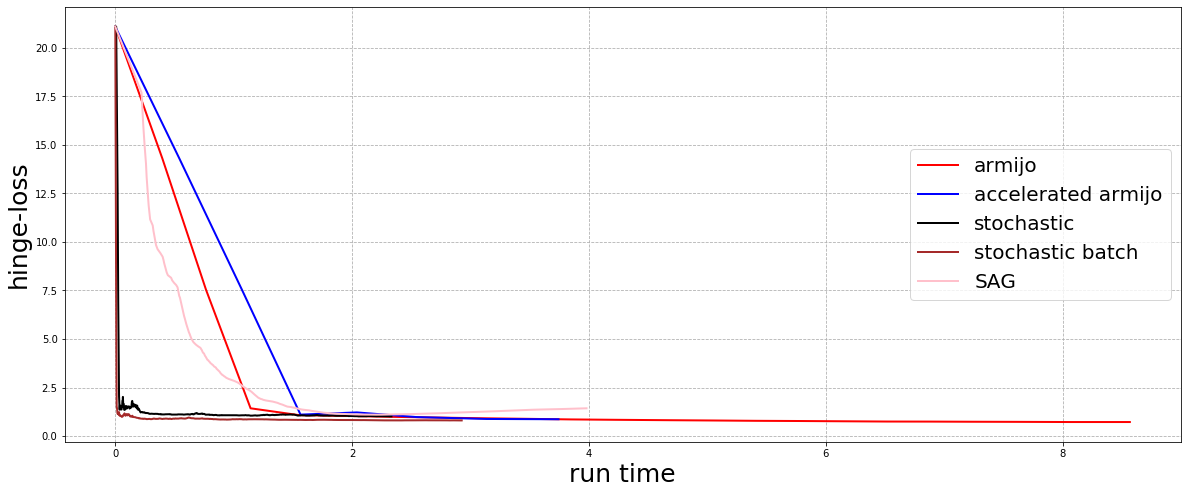

In [246]:
fig = plt.figure(figsize=(20, 8))
plt.plot(runTime_method6_hinge_loss, array_method6_hinge_loss, label=("armijo"), linewidth=2.0, color ="red")
plt.plot(runTime_method7_hinge_loss, array_method7_hinge_loss, label=("accelerated armijo"), linewidth=2.0, color ="blue")
plt.plot(runTime_method2_hinge_loss, array_method2_hinge_loss, label=("stochastic"), linewidth=2.0, color ="black")
plt.plot(runTime_method3_hinge_loss, array_method3_hinge_loss, label=("stochastic batch"), linewidth=2.0, color ="brown")
plt.plot(runTime_method5_hinge_loss, array_method5_hinge_loss, label=("SAG"), linewidth=2.0, color ="pink")
plt.legend(prop={'size': 20},loc="right")
plt.xlabel("run time", fontsize=25)
plt.ylabel("hinge-loss", fontsize=25)
plt.grid(linestyle='dashed')
plt.show()

In [247]:
path = "/Users/lingxuan925/Documents/CS794/a4/datasets/news20.binary"
trainingL, trainingD = svm_read_problem(path)

vectors = sklearn.feature_extraction.DictVectorizer(sparse=True, dtype=float)
trainingD = vectors.fit_transform(trainingD)
trainingL = np.array([trainingL]).T

# add a column of 1
n = trainingD.shape[0]
ones = np.ones((n,1))
trainingD = hstack([ones, trainingD]).tocsr()

trainingD, validationSet, trainingL, vLabel = train_test_split(trainingD, trainingL, test_size=0.1)

def getW_news():
    weights = np.ones(trainingD.shape[1])
    weights = np.reshape(weights,(len(weights),1))
    return weights

In [176]:
weights = getW_news()
weights_method6, array_method6, runTime_method6 = gradient_descent_armijo(weights, trainingL, trainingD, lambda_, gamma, max_iterations, epsilon)
p,error = validation(weights_method6, vLabel, validationSet)
print("error "+ str(error))

error 0.1925


In [177]:
weights = getW_news()
weights_method7, array_method7, runTime_method7 = accelerated_armijo(weights, trainingL, trainingD, lambda_, gamma, max_iterations, epsilon)
p,error = validation(weights_method7, vLabel, validationSet)
print("error "+ str(error))

error 0.2325


In [248]:
weights = getW_news()
weights_method3, array_method3, runTime_method3 = stochastic_gradient_descent_miniBatch(weights, trainingL, trainingD, lambda_, max_iterations)
p,error = validation(weights_method3,vLabel,validationSet)
print("error "+ str(error))

error 0.5005


In [249]:
weights = getW_news()
weights_method2, array_method2, runTime_method2 = stochastic_gradient_descent(weights, trainingL, trainingD, lambda_, max_iterations)
p,error = validation(weights_method2,vLabel,validationSet)
print(error)

0.5005


In [250]:
weights = getW_news()

weights_method5, array_method5, runTime_method5 = stochastic_gradient_descent_avg(weights, trainingL, trainingD, lambda_, max_iterations)
p,error = validation(weights_method5,vLabel,validationSet)
print("error "+ str(error))

error 0.5015


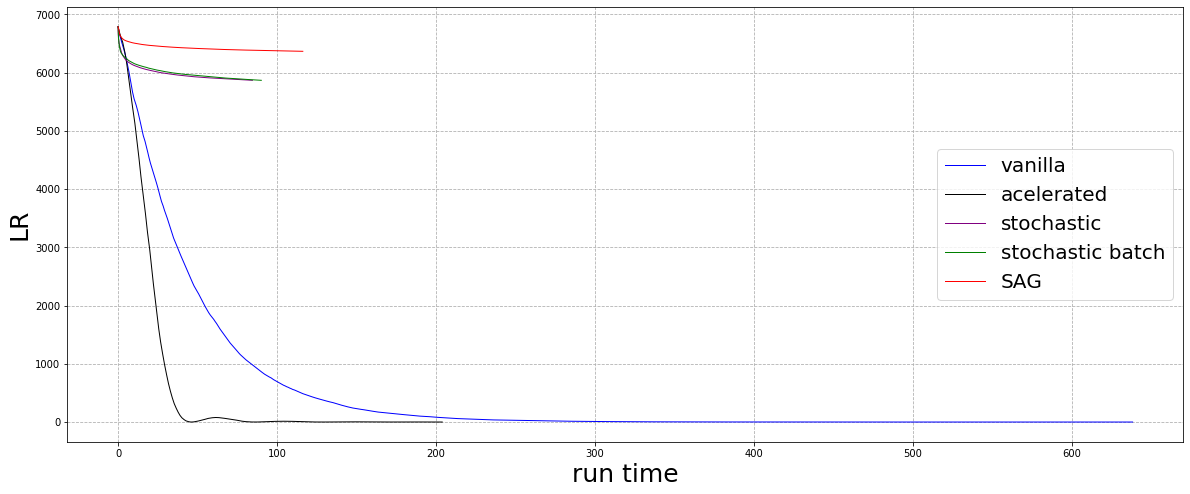

In [181]:
fig = plt.figure(figsize=(20, 8))
plt.plot(runTime_method6, array_method6, label=("vanilla"), linewidth=1.0, color ="blue")
plt.plot(runTime_method7, array_method7, label=("acelerated"), linewidth=1.0, color ="black")
plt.plot(runTime_method2, array_method2, label=("stochastic"), linewidth=1.0, color ="purple")
plt.plot(runTime_method3, array_method3, label=("stochastic batch"), linewidth=1.0, color ="green")
plt.plot(runTime_method5, array_method5, label=("SAG"), linewidth=1.0, color ="red")
plt.legend(prop={'size': 20},loc="right")
plt.xlabel("run time", fontsize=25)
plt.ylabel("LR", fontsize=25)
plt.grid(linestyle='dashed')
plt.show()

In [251]:
weights = getW_news()
weights_stochastic, hinge_loss_array_stochastic, runTime_stochastic = stochastic_subgradient_hinge_Loss(weights, trainingL, trainingD, max_iterations)
p,error = validation_hinge_loss(weights_stochastic,vLabel,validationSet)
print("error "+ str(error))

error 0.5005


In [252]:
weights = getW_news()
weights_sag, hinge_loss_array_sag, runTime_sag = sag(weights, trainingL, trainingD, max_iterations)
p,error = validation_hinge_loss(weights_sag,vLabel,validationSet)
print("error "+ str(error))

error 0.5015


In [253]:
weights = getW_news()
weights_minibatch, hinge_loss_array_minibatch, runTime_minibatch = sub_stochastic_gradient_mini_hinge(weights, trainingL, trainingD, max_iterations)
p,error = validation_hinge_loss(weights_minibatch,vLabel,validationSet)
print("error "+ str(error))

error 0.5005


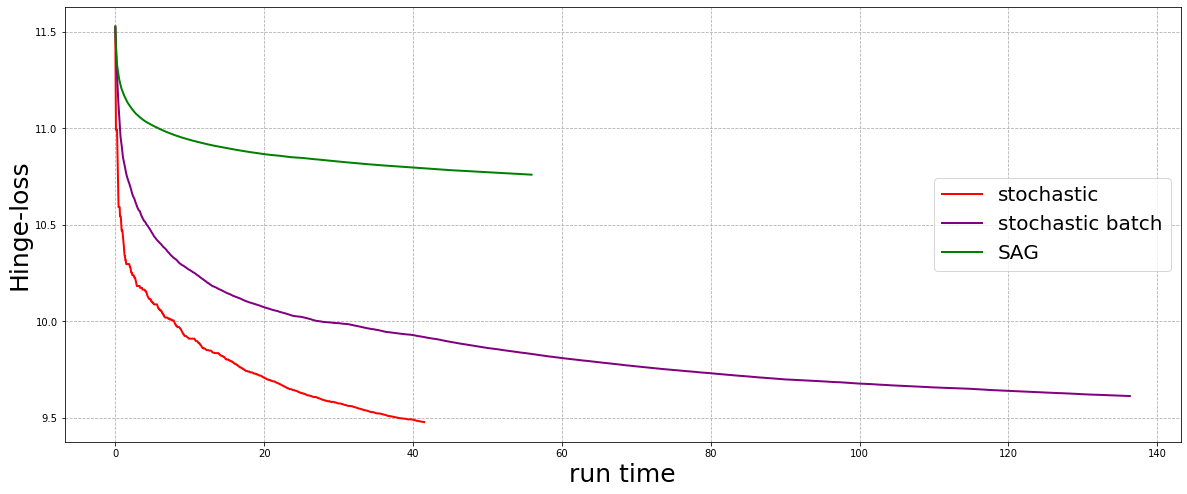

In [254]:
fig = plt.figure(figsize=(20, 8))
plt.plot(runTime_stochastic, hinge_loss_array_stochastic, label=("stochastic"), linewidth=2.0, color ="red")
plt.plot(runTime_minibatch, hinge_loss_array_minibatch, label=("stochastic batch"), linewidth=2.0, color ="purple")
plt.plot(runTime_sag, hinge_loss_array_sag, label=("SAG"), linewidth=2.0, color ="green")
plt.legend(prop={'size': 20},loc="right")
plt.xlabel("run time", fontsize=25)
plt.ylabel("Hinge-loss", fontsize=25)
plt.grid(linestyle='dashed')
plt.show()

In [ ]:
weights = getW_news()
weights_method5_hinge_loss, array_method5_hinge_loss, runTime_method5_hinge_loss = stochastic_gradient_descent_avg_hing(weights, trainingL, trainingD, max_iterations, epsilon, mu)
p,error = validation_hinge_loss(weights_method5_hinge_loss, vLabel,validationSet)
print("error "+ str(error))

In [255]:
path = "/Users/lingxuan925/Documents/CS794/a4/datasets/covtype.libsvm.binary.scale"
trainingL, trainingD = svm_read_problem(path)

vectors = sklearn.feature_extraction.DictVectorizer(sparse=True, dtype=float)
trainingD = vectors.fit_transform(trainingD)
trainingL = np.array([trainingL]).T
trainingL = np.where(trainingL == 2,-1,1)

n = trainingD.shape[0]
ones = np.ones((n,1))
trainingD = hstack([ones, trainingD]).tocsr()

trainingD, validationSet, trainingL, vLabel = train_test_split(trainingD, trainingL, test_size=0.1)

def getW_cov():
    weights = np.zeros(trainingD.shape[1])
    weights = np.reshape(weights,(len(weights),1))
    return weights

In [256]:
weights = getW_cov()
weights_method5, array_method5, runTime_method5 = stochastic_gradient_descent_avg(weights, trainingL, trainingD, lambda_, max_iterations)
p,error = validation(weights_method5,vLabel,validationSet)
print("error "+ str(error))

error 0.39246497538811054


In [257]:
weights = getW_cov()
weights_method3, array_method3, runTime_method3 = stochastic_gradient_descent_miniBatch(weights, trainingL, trainingD, lambda_, max_iterations)
p,error = validation(weights_method3,vLabel,validationSet)
print("error "+ str(error))

error 0.42069119823758216


In [258]:
weights = getW_cov()
weights_method2, array_method2, runTime_method2 = stochastic_gradient_descent(weights, trainingL, trainingD, lambda_, max_iterations)
p,error = validation(weights_method2,vLabel,validationSet)
print(error)

0.4238752538638945


In [193]:
weights = getW_cov()
weights_method7, array_method7, runTime_method7 = accelerated_armijo(weights, trainingL, trainingD, lambda_, gamma, max_iterations, epsilon)
p,error = validation(weights_method7,vLabel,validationSet)
print("error "+ str(error))

error 0.31203745137861005


In [194]:
weights = getW_cov()
weights_method6, array_method6, runTime_method6 = gradient_descent_armijo(weights, trainingL, trainingD, lambda_, gamma, max_iterations, epsilon)
p,error = validation(weights_method6,vLabel,validationSet)
print("error "+ str(error))

error 0.31010980689132905


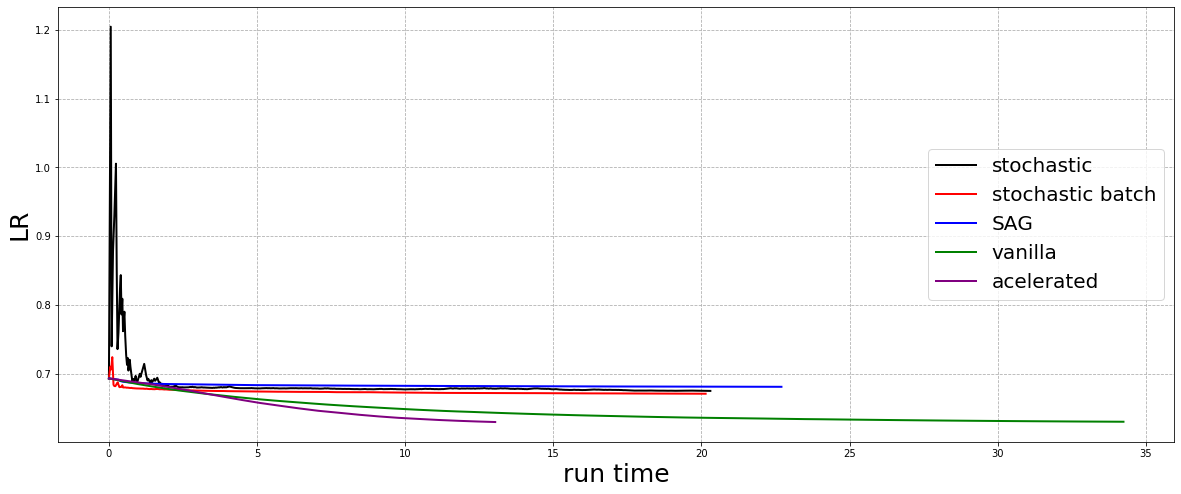

In [259]:
fig = plt.figure(figsize=(20, 8))
plt.plot(runTime_method2, array_method2, label=("stochastic"), linewidth=2.0, color ="black")
plt.plot(runTime_method3, array_method3, label=("stochastic batch"), linewidth=2.0, color ="red")
plt.plot(runTime_method5, array_method5, label=("SAG"), linewidth=2.0, color ="blue")
plt.plot(runTime_method6, array_method6, label=("vanilla"), linewidth=2.0, color ="green")
plt.plot(runTime_method7, array_method7, label=("acelerated"), linewidth=2.0, color ="purple")
plt.legend(prop={'size': 20},loc="right")
plt.xlabel("run time", fontsize=25)
plt.ylabel("LR", fontsize=25)
plt.grid(linestyle='dashed')
plt.show()

In [260]:
weights = getW_cov()
weights_sag, hinge_loss_array_sag, runTime_sag = sag(weights, trainingL, trainingD, max_iterations)
p,error = validation_hinge_loss(weights_sag,vLabel,validationSet)
print("error "+ str(error))

error 0.39246497538811054


In [261]:
weights = getW_cov()
weights_minibatch, hinge_loss_array_minibatch, runTime_minibatch = sub_stochastic_gradient_mini_hinge(weights, trainingL, trainingD, max_iterations)
p,error = validation_hinge_loss(weights_minibatch,vLabel,validationSet)
print("error "+ str(error))

error 0.4606898213486627


In [262]:
weights = getW_cov()
weights_stochastic, hinge_loss_array_stochastic, runTime_stochastic = stochastic_subgradient_hinge_Loss(weights, trainingL, trainingD, max_iterations)
p,error = validation_hinge_loss(weights_stochastic,vLabel,validationSet)
print("error "+ str(error))

error 0.3866820419262676


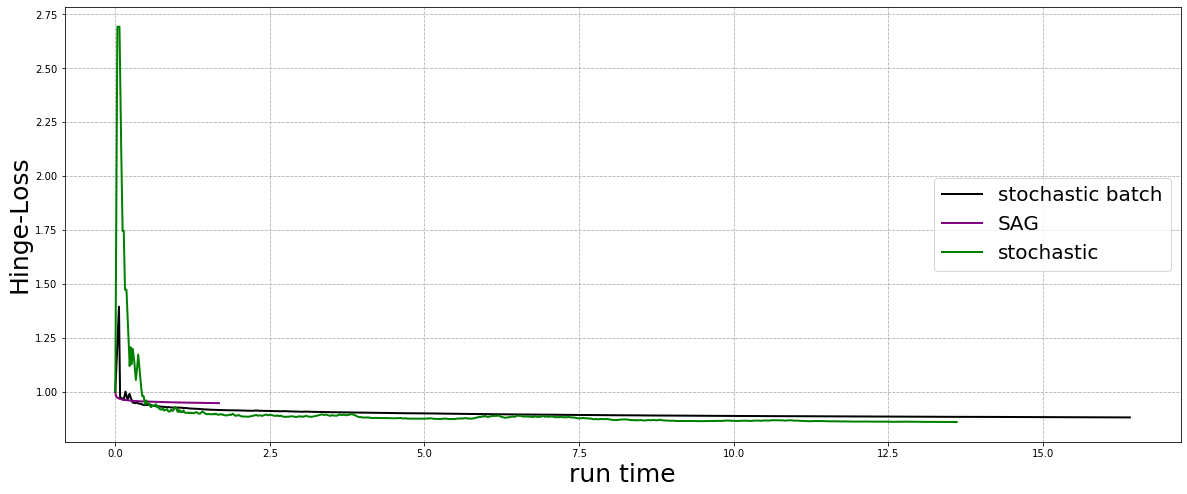

In [263]:
fig = plt.figure(figsize=(20, 8))
plt.plot(runTime_minibatch, hinge_loss_array_minibatch, label=("stochastic batch"), linewidth=2.0, color ="black")
plt.plot(running_sag,hinge_loss_array_sag, label=("SAG"), linewidth=2.0, color ="purple")
plt.plot(runTime_stochastic,hinge_loss_array_stochastic, label=("stochastic"), linewidth=2.0, color ="green")
plt.legend(prop={'size': 20},loc="right")
plt.xlabel("run time", fontsize=25)
plt.ylabel("Hinge-Loss", fontsize=25)
plt.grid(linestyle='dashed')
plt.show()

In [264]:
weights = getW_cov()
weights_method5_smooth, array_method5_smooth, runTime_method5_smooth = sag_hinge_loss(weights, trainingL, trainingD, max_iterations, mu)
p,error = validation_hinge_loss(weights_method5_smooth, vLabel, validationSet)
print("error "+ str(error))

error 0.39246497538811054


In [265]:
weights = getW_cov()
weights_method3_smooth, array_method3_smooth, runTime_method3_smooth = stochastic_gradient_descent_miniBatch_hinge_loss(weights, trainingL, trainingD, max_iterations, mu)
p,error = validation_hinge_loss(weights_method3_smooth, vLabel,validationSet)
print("error "+ str(error))

error 0.3323465629410347


In [206]:
weights = getW_cov()
weights_method7_smooth, array_method7_smooth, runTime_method7_smooth = accelerated_gradient_armijo_hinge(weights, trainingL, trainingD, gamma, 50, epsilon, mu)
p,error = validation_hinge_loss(weights_method7_smooth, vLabel,validationSet)
print("error "+ str(error))


3
error 0.39525317545007055


In [266]:
weights = getW_cov()
weights_method2_smooth, array_method2_smooth, runTime_method2_smooth = stochastic_gradient_descent_hinge_loss(weights, trainingL, trainingD, max_iterations, mu)
p,error = validation_hinge_loss(weights_method2_smooth, vLabel,validationSet)
print("error "+ str(error))

error 0.4367491652610926


In [209]:
weights = getW_cov()
weights_method6_smooth, array_method6_smooth, runTime_method6_smooth = graddescent_armijo_hinge(weights, trainingL, trainingD, gamma, 50, epsilon, mu)
p,error = validation_hinge_loss(weights_method6_smooth, vLabel, validationSet)
print("error "+ str(error))

2
error 0.39525317545007055


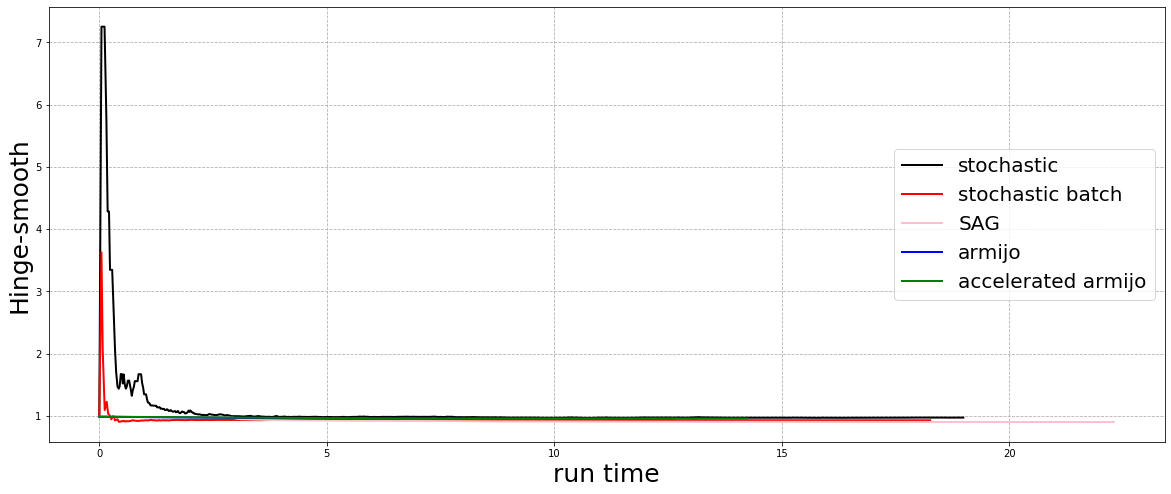

In [267]:
fig = plt.figure(figsize=(20, 8))
plt.plot(runTime_method2_smooth, array_method2_smooth, label=("stochastic"), linewidth=2.0, color ="black")
plt.plot(runTime_method3_smooth, array_method3_smooth, label=("stochastic batch"), linewidth=2.0, color ="red")
plt.plot(runTime_method5_smooth, array_method5_smooth, label=("SAG"), linewidth=2.0, color ="pink")
plt.plot(runTime_method6_smooth, array_method6_smooth, label=("armijo"), linewidth=2.0, color ="blue")
plt.plot(runTime_method7_smooth, array_method7_smooth, label=("accelerated armijo"), linewidth=2.0, color ="green")
plt.legend(prop={'size': 20},loc="right")
plt.xlabel("run time", fontsize=25)
plt.ylabel("Hinge-smooth", fontsize=25)
plt.grid(linestyle='dashed')
plt.show()